In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy import stats
from sklearn import model_selection
from scipy.sparse.linalg import lsqr
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
def show1(img):
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.imshow (img , interpolation = "nearest") # also try interpolation =" bicubic "
    plt.show()
def show2(img):  
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.imshow (img , interpolation = "bicubic") # also try interpolation =" bicubic "
    plt.show()

# 4 Automatic feature selection for regression

## 4.1 Implement Orthogonal Matching Pursuit

In [3]:
def omp_regression(X, y, T):
    r = y
    A = []
    for i in range(T):
        j= np.argmax(np.absolute(np.dot(X.T, r)))
        A.append(j)
        X_active = np.zeros(X.shape)
        X_active = X[:,A]
        S = np.dot(X_active.T, X_active)
        beta= np.dot(LA.inv(S),np.dot(X_active.T, y))
        r = y- np.dot(X_active, beta)
    X_active = np.zeros(X.shape)
    X_active[:,A] = X[:,A]
    beta = np.array(lsqr(X_active, y)[0])
    return beta

## 4.2 Classification with sparse LDA

In [4]:
def data_preparation(digits, test_percentage = 0.33, random_seed=0): #From sample solution
    """
    This function filters the digits (1, 7) from the dataset and randomly splits it in train and test set.
    """
    data = digits["data"]
    target = digits["target"]
    
    # Data filering 
    num_1, num_2 = 1, 7
    mask = np.logical_or(target == num_1, target == num_2)
    data = data[mask]/data.max()
    target = target[mask]
    
    # Relabel targets
    target[target == num_1] = 1
    target[target == num_2] = -1

    # Random split
    x_training, x_test, y_training, y_test = train_test_split(data, target, test_size=test_percentage,
                                                                      random_state=random_seed)
    
    
    return x_training, x_test, y_training, y_test

Load Data

In [5]:
digits = load_digits()
x_training, x_test, y_training, y_test = data_preparation(digits, test_percentage = 0.33, random_seed=0)

In [6]:
def sparse_LDA_error(T):
    beta = omp_regression(x_training, y_training, T) # Desde 12 predice perfecto 
    y_predicted = np.dot(x_test, beta)
    y_response = np.where(y_predicted>=0, 1,-1)

    error_array = np.where(y_response == y_test, 0, 1)

    return np.mean(error_array)

For T = 1


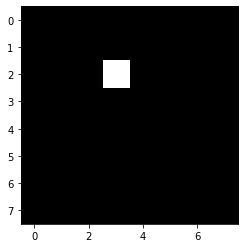

Actual error = 0.575

 

For T = 2


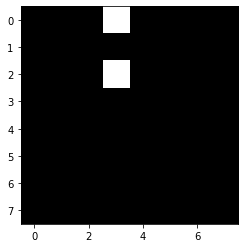

New Pixel against 1
Number of predicted 1s = 57
Actual error = 0.05

 

For T = 3


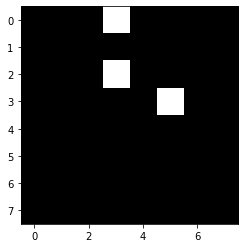

New Pixel in favour of 1
Number of predicted 1s = 56
Actual error = 0.041666666666666664

 

For T = 4


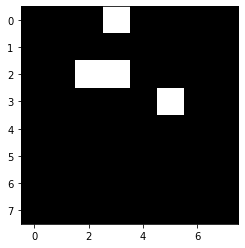

New Pixel in favour of 1
Number of predicted 1s = 53
Actual error = 0.016666666666666666

 

For T = 5


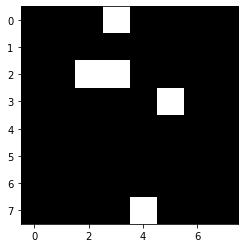

New Pixel in favour of 1
Number of predicted 1s = 52
Actual error = 0.008333333333333333

 

For T = 6


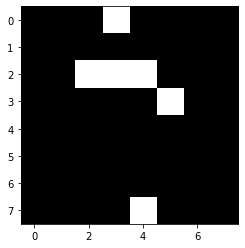

New Pixel against 1
Number of predicted 1s = 52
Actual error = 0.008333333333333333

 

For T = 7


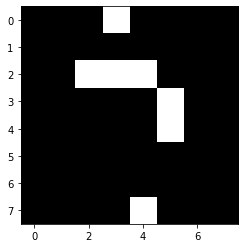

New Pixel against 1
Number of predicted 1s = 52
Actual error = 0.008333333333333333

 

For T = 8


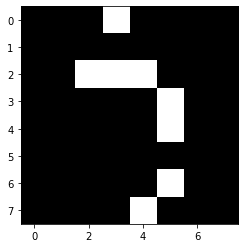

New Pixel in favour of 1
Number of predicted 1s = 51
Actual error = 0.0

 

For T = 9


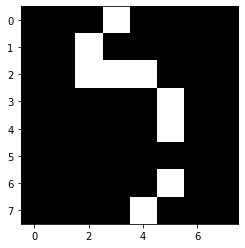

New Pixel against 1
Number of predicted 1s = 52
Actual error = 0.008333333333333333

 

For T = 10


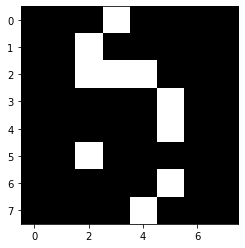

New Pixel against 1
Number of predicted 1s = 52
Actual error = 0.008333333333333333

 

For T = 11


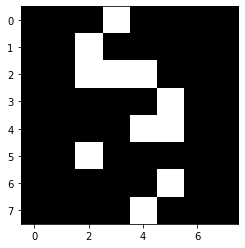

New Pixel against 1
Number of predicted 1s = 52
Actual error = 0.008333333333333333

 

For T = 12


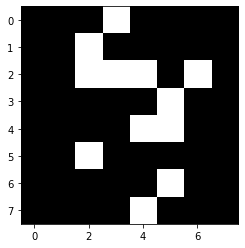

New Pixel in favour of 1
Number of predicted 1s = 51
Actual error = 0.0

 



In [7]:
T = 12
x = np.arange(T)+1
y = np.array([])
number_of_1_old = 0
for i in range(T):
    beta = omp_regression(x_training, y_training, i+1) # Desde 12 predice perfecto 
    indices = np.where(beta !=0, 12,0)
    image = np.reshape(indices,(8,8))
    print("For T = "+ str(i+1))
    show1(image)
    y_predicted = np.dot(x_test, beta)
    y_response = np.where(y_predicted>=0, 1,-1)
    if i>0:
        number_of_1 = np.count_nonzero(y_response ==1)
        if number_of_1<number_of_1_old:
            print("New Pixel in favour of 1")
        else: 
            print("New Pixel against 1")
        number_of_1_old = number_of_1
        print("Number of predicted 1s = " + str(number_of_1))
    error_array = np.where(y_response == y_test, 0, 1)
    print("Actual error = " + str(np.mean(error_array)))
    print("\n \n")
    y = np.append(y, np.mean(error_array))

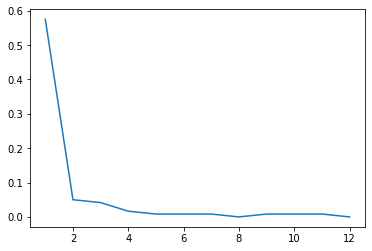

In [8]:
plt.plot(x,y)

### Our solution for Ex02

In [9]:
indices_ex02_manual = np.loadtxt('indices_ex02.txt',dtype= int)
indices_favour_1 = np.loadtxt('indices_favour_1.txt',dtype= int)
indices_against_1 = np.loadtxt('indices_against_1.txt',dtype= int)

In [10]:
beta = omp_regression(x_training, y_training, 10) 
indices_automatic = np.where(beta !=0)

In [11]:
count  = 0
for i in range(len(indices_automatic[0])):
    count = count + np.count_nonzero(indices_ex02_manual ==indices_automatic[0][i])
print("number of equal selected features = " + str(count))

number of equal selected features = 5


In [12]:
count  = 0
for i in range(len(indices_automatic[0])):
    count = count + np.count_nonzero(indices_favour_1 ==indices_automatic[0][i])
print("number of equal selected features (Our choosen features in favour of 1) = " + str(count))

number of equal selected features (Our choosen features in favour of 1) = 4


In [13]:
count  = 0
for i in range(len(indices_automatic[0])):
    count = count + np.count_nonzero(indices_against_1 ==indices_automatic[0][i])
print("number of equal selected features (Our choosen features against of 1) = " + str(count))

number of equal selected features (Our choosen features against of 1) = 1


## 4.3 One-against-the-rest classification

In [14]:
def data_preparation_one(digits, selected_number,test_percentage = 0.33, random_seed=0):
    """
    This function filters the digits (1, 7) from the dataset and randomly splits it in train and test set.
    """
    data = digits["data"]
    target = digits["target"]
    
    # Positive subset
    #data_positive = data[target ==selected_number]
    #target_positive = target[target ==selected_number]
    
    # Negative subset
    #data_negative = data[target !=selected_number]
    #target_negative = target[target !=selected_number]
    if selected_number>=0:
    # Random split
        x_training, x_test, y_training, y_test = train_test_split(data, target, test_size=test_percentage,
                                                                          random_state=random_seed)
        # Positive subset
        x_positive = x_training[y_training ==selected_number]
        y_positive = y_training[y_training ==selected_number]

        # Negative subset
        x_negative = x_training[y_training !=selected_number]
        y_negative = y_training[y_training !=selected_number]

        p = np.random.permutation(len(y_negative))
        x_negative = x_negative[p]
        y_negative = y_negative[p]
        x_negative = x_negative[:len(y_positive)]
        y_negative = y_negative[:len(y_positive)]
        x_training = np.concatenate((x_positive, x_negative))
        y_training = np.concatenate((y_positive, y_negative))
        p = np.random.permutation(len(y_training))
        x_training = x_training[p]
        y_training = y_training[p]
        y_training[y_training != selected_number] = -1
        y_training[y_training == selected_number] = 1
        return x_training,y_training, x_test, y_test
    else:
        x_training, x_test, y_training, y_test = train_test_split(data, target, test_size=test_percentage,
                                                                          random_state=random_seed)
        return x_test, y_test

In [15]:
def one_against_the_rest(T,digits):
    y_predicted = np.array([])
    for i in range(10):
        x_training,y_training,  x_test, y_test = data_preparation_one(digits, i,test_percentage = 0.33, random_seed=0)
        beta = omp_regression(x_training, y_training, T) # Desde 12 predice perfecto 
        y_predicted_actual = np.dot(x_test, beta)
        y_predicted = np.append(y_predicted,y_predicted_actual, axis = 0)
    y_predicted = np.reshape(y_predicted, (10, len(y_test)))
    sign = np.sign(y_predicted)
    Sum = np.sum(sign,axis =0)
    y_response = np.argmax(y_predicted, axis=0)
    y_response = np.where(Sum==-10, -100, y_response) #"unknown" equivalent to -100
    return y_response

In [16]:
digits = load_digits()
x_test, y_test = data_preparation_one(digits, -1,test_percentage = 0.33, random_seed=0)

In [17]:
def error_one_against_the_rest_classifier(T,digits):
    y_response = one_against_the_rest(T,digits)

    number_of_unknown = np.count_nonzero(y_response ==-100)

    error_array = np.where(y_response == y_test, 0,1)

    error  = np.mean(error_array)

    print("number of errors = " +str(np.count_nonzero(error_array==1)) + "\n number of unknown values = " + str(number_of_unknown) + 
          "\n total number of instances = " + str(len(error_array)) + "\n mean error(unknown counts as error) = " +str(error))
    return error, number_of_unknown

In [18]:
T = 25
x = np.arange(T)+1
error_array = np.array([])
unknown_array = np.array([])
for i in range(T):
    print("T = " + str(i+1))
    error,unknown = error_one_against_the_rest_classifier(i+1,digits)
    error_array = np.append(error_array, error)
    unknown_array = np.append(unknown_array,unknown )
    print("\n \n")

T = 1
number of errors = 474
 number of unknown values = 0
 total number of instances = 594
 mean error(unknown counts as error) = 0.797979797979798

 

T = 2
number of errors = 191
 number of unknown values = 3
 total number of instances = 594
 mean error(unknown counts as error) = 0.32154882154882153

 

T = 3
number of errors = 146
 number of unknown values = 10
 total number of instances = 594
 mean error(unknown counts as error) = 0.24579124579124578

 

T = 4
number of errors = 124
 number of unknown values = 12
 total number of instances = 594
 mean error(unknown counts as error) = 0.20875420875420875

 

T = 5
number of errors = 89
 number of unknown values = 9
 total number of instances = 594
 mean error(unknown counts as error) = 0.14983164983164984

 

T = 6
number of errors = 80
 number of unknown values = 3
 total number of instances = 594
 mean error(unknown counts as error) = 0.13468013468013468

 

T = 7
number of errors = 61
 number of unknown values = 4
 total number 

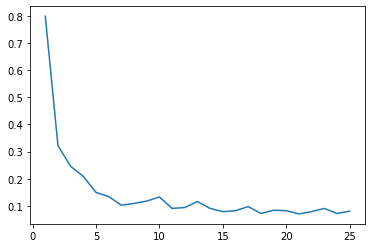

In [19]:
plt.plot(x,error_array)

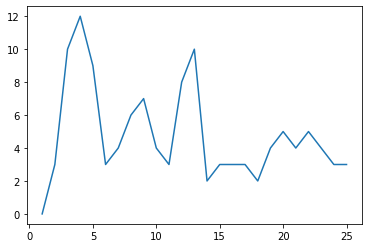

In [20]:
plt.plot(x,unknown_array)